## Topic:

Data driven prediction models of energy use of appliances in a low-energy house

## Brief Description

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters)

# Attribute information:

date time year-month-day hour:minute:second \
Appliances, energy use in Wh \
lights, energy use of light fixtures in the house in Wh \
T1, Temperature in kitchen area, in Celsius \
RH_1, Humidity in kitchen area, in % \
T2, Temperature in living room area, in Celsius \
RH_2, Humidity in living room area, in % \
T3, Temperature in laundry room area \
RH_3, Humidity in laundry room area, in % \
T4, Temperature in office room, in Celsius \
RH_4, Humidity in office room, in % \
T5, Temperature in bathroom, in Celsius \
RH_5, Humidity in bathroom, in % \
T6, Temperature outside the building (north side), in Celsius \
RH_6, Humidity outside the building (north side), in % \
T7, Temperature in ironing room , in Celsius \
RH_7, Humidity in ironing room, in % \ 
T8, Temperature in teenager room 2, in Celsius \
RH_8, Humidity in teenager room 2, in % \
T9, Temperature in parents room, in Celsius \
RH_9, Humidity in parents room, in % \
To, Temperature outside (from Chievres weather station), in Celsius \
Pressure (from Chievres weather station), in mm Hg \
RH_out, Humidity outside (from Chievres weather station), in % \
Wind speed (from Chievres weather station), in m/s \
Visibility (from Chievres weather station), in km \
Tdewpoint (from Chievres weather station), Â°C \
rv1, Random variable 1, nondimensional \
rv2, Random variable 2, nondimensional

Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.

# Source Data set

The energy data source can be found in the link: 'http://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv'

The data will be used throughout this course

In [1]:
import pandas as pd
import numpy as np

# Import Data from Source

In [2]:
energy = 'energy_data.csv'
df = pd.read_csv(energy)

Now the data is uploaded, to see what the data set looks like, the head() will be used

In [3]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11/01/2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11/01/2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11/01/2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11/01/2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11/01/2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


To see the tail, df.tail() will be used

In [4]:
df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,27/05/2016 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.7,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812
19731,27/05/2016 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.6,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940
19732,27/05/2016 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.5,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117
19733,27/05/2016 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.3,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784
19734,27/05/2016 18:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.2,755.2,57.000000,4.000000,27.000000,13.2,34.118851,34.118851


In [5]:
# To check how many rows
df.shape

(19735, 29)

In [6]:
#for time saving and accuracy, we can make all the variable hearders lower case
df.columns = [x.lower() for x in df.columns]
df = df.set_index("date")
df.head()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
11/01/2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
11/01/2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
11/01/2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
11/01/2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
11/01/2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


# Data sctructure. checking missing value

In [7]:
# To identify the null value
df.isnull().sum()

appliances     0
lights         0
t1             0
rh_1           0
t2             0
rh_2           0
t3             0
rh_3           0
t4             0
rh_4           0
t5             0
rh_5           0
t6             0
rh_6           0
t7             0
rh_7           0
t8             0
rh_8           0
t9             0
rh_9           0
t_out          0
press_mm_hg    0
rh_out         0
windspeed      0
visibility     0
tdewpoint      0
rv1            0
rv2            0
dtype: int64

# Evaluating missing data

This is to identify and display any missing values. Where True means there is a missing value and False means there is no missing value

In [8]:
missing_data = df.isnull()
missing_data.head()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
11/01/2016 17:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11/01/2016 17:10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11/01/2016 17:20,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11/01/2016 17:30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11/01/2016 17:40,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
# To further confirm any missing value
df.isnull().sum().sum()

0

The dataset is now loaded into the variable dataset. I'll just take a glimpse of the data using the desribe() and info() methods before I actually start processing and visualizing it.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 11/01/2016 17:00 to 27/05/2016 18:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   t1           19735 non-null  float64
 3   rh_1         19735 non-null  float64
 4   t2           19735 non-null  float64
 5   rh_2         19735 non-null  float64
 6   t3           19735 non-null  float64
 7   rh_3         19735 non-null  float64
 8   t4           19735 non-null  float64
 9   rh_4         19735 non-null  float64
 10  t5           19735 non-null  float64
 11  rh_5         19735 non-null  float64
 12  t6           19735 non-null  float64
 13  rh_6         19735 non-null  float64
 14  t7           19735 non-null  float64
 15  rh_7         19735 non-null  float64
 16  t8           19735 non-null  float64
 17  rh_8         19735 non-null  float64
 18  t9           19735 non-nu

In [11]:
df.describe()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


# Descriptive statistics

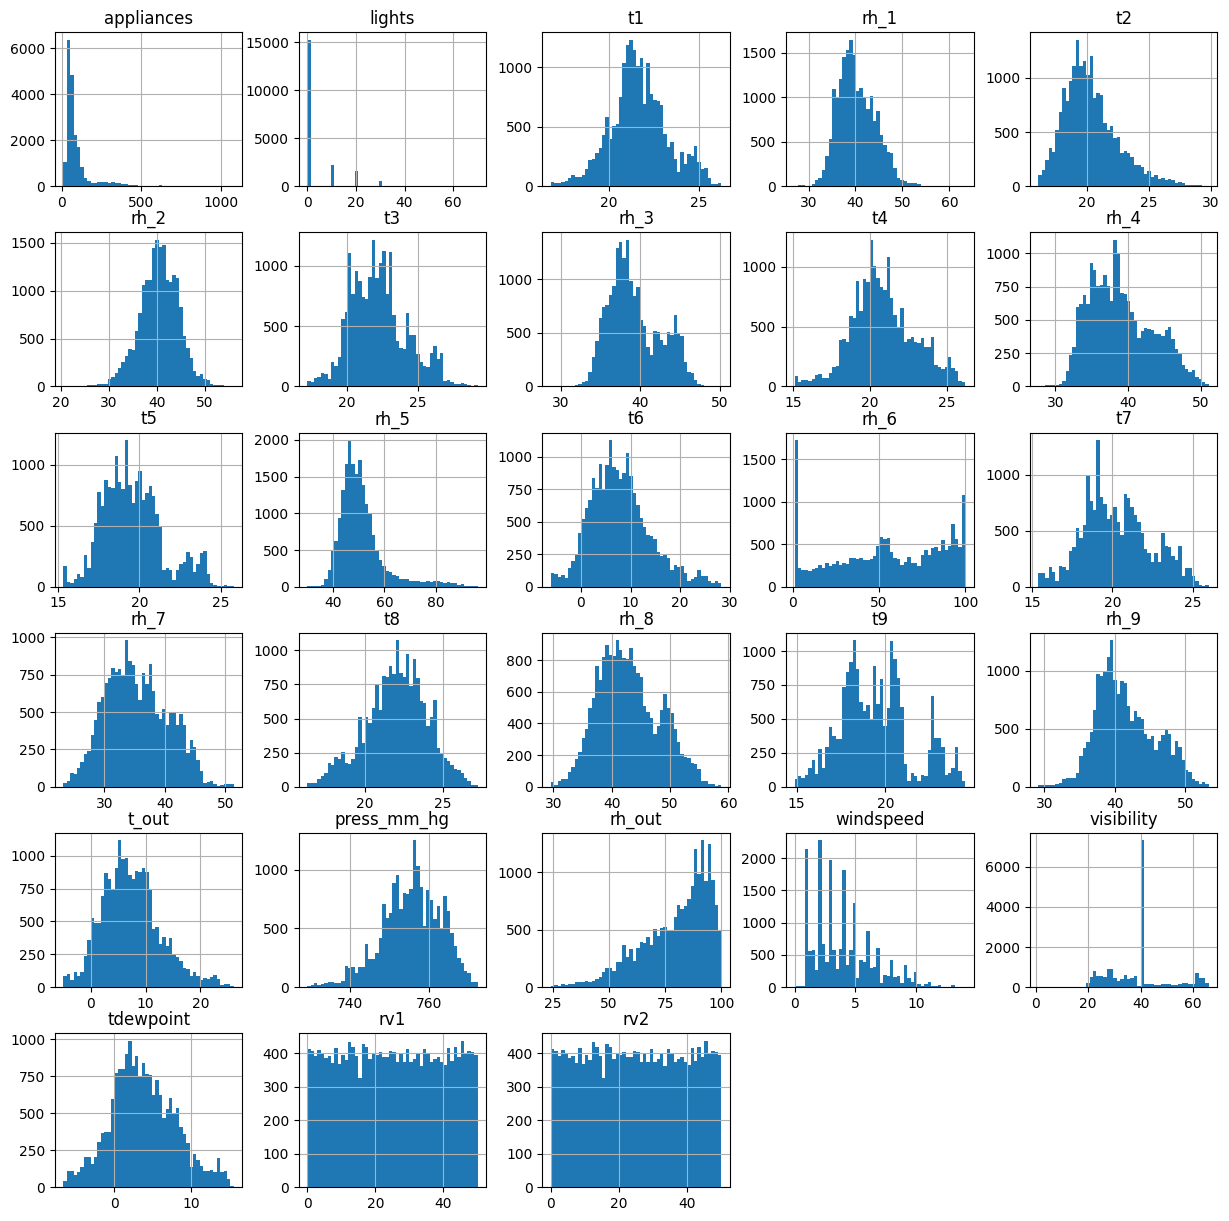

In [12]:
#To check the numerical distribution of differnt variables 
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(15, 15))
plt.savefig('attribute_histogram_plots')
plt.show()

# Finding correlation in our data

In [13]:
df.corr()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015357,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074423,-0.010576,0.068543,0.060281,0.020038,-0.036331,0.000521,0.000521
t1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682854,-0.150574,-0.345481,-0.087654,-0.076210,0.571333,-0.006203,-0.006203
rh_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340788,-0.293957,0.274126,0.204932,-0.021057,0.639125,-0.000699,-0.000699
t2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792247,-0.133028,-0.505291,0.052495,-0.069721,0.582632,-0.011087,-0.011087
rh_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.054544,0.676467,0.033703,-0.255646,0.584911,0.069190,-0.005368,0.499154,0.006275,0.006275
t3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.901324,0.134602,0.699420,-0.189974,-0.281718,-0.100776,-0.102310,0.645909,-0.005194,-0.005194
rh_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.195270,0.833538,0.118237,-0.233274,0.356192,0.263188,0.017041,0.414398,-0.000477,-0.000477
t4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.889439,-0.025549,0.663479,-0.075292,-0.388602,-0.185747,-0.104768,0.519504,-0.001815,-0.001815
rh_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.044518,0.856591,0.293307,-0.250748,0.336813,0.300192,0.002636,0.616508,-0.001787,-0.001787


In [14]:
import pip
pip.main(['install','seaborn'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: seaborn in /opt/conda/lib/python3.9/site-packages (0.11.2)

Requirement already satisfied: scipy>=1.0 in /opt/conda/lib/python3.9/site-packages (from seaborn) (1.6.3)

Requirement already satisfied: pandas>=0.23 in /opt/conda/lib/python3.9/site-packages (from seaborn) (1.2.4)

Requirement already satisfied: matplotlib>=2.2 in /opt/conda/lib/python3.9/site-packages (from seaborn) (3.4.1)

Requirement already satisfied: numpy>=1.15 in /opt/conda/lib/python3.9/site-packages (from seaborn) (1.22.2)

Requirement already satisfied: python-dateutil>=2.7 in /opt/conda/lib/python3.9/site-packages (from matplotlib>=2.2->seaborn) (2.8.2)

Requirement already satisfied: cycler>=0.10 in /opt/conda/lib/python3.9/site-packages (from matplotlib>=2.2->seaborn) (0.11.0)

Requirement already satisfied: pillow>=6.2.0 in /opt/conda/lib/python3.9/site-packages (from matplotlib>=2.2->seaborn) (8.3.2)

Requirement already satisfied: pyparsing>=2.2.1 in /opt/conda/lib/python3.9/site-packages (from matplotlib>=2.2->seaborn) (2.4.7)

Requirement already satisfied: kiwisolver>=1.0.1 in /opt/conda/lib/python3.9/site-packages (from matplotlib>=2.2->seaborn) (1.3.2)

Requirement already satisfied: pytz>=2017.3 in /opt/conda/lib/python3.9/site-packages (from pandas>=0.23->seaborn) (2021.1)

Requirement already satisfied: six>=1.5 in /opt/conda/lib/python3.9/site-packages (from python-dateutil>=2.7->matplotlib>=2.2->seaborn) (1.16.0)

0

In [ ]:
# To have an insight on the correlation, we will map the correlation
import seaborn as sns
sns.pairplot(df)

In [ ]:
#so we need another visualisation of our correlations # to make the heatmap of diff correlation
%matplotlib inline

In [ ]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
df_heatmap=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Dealing with outliers

In [ ]:
#the energy consuption of our appliances
sorted_appliances = df.sort_values('appliances', ascending=False)
sorted_appliances.head()

#the highest energy consumed is 1080watts.

In [ ]:
#to check the 1% of outlier
len(sorted_appliances.head(len(sorted_appliances)//1000))

it means the value of free energy consumed is 19

In [ ]:
#to identify the value of 19 in our data. the 19th place
sorted_appliances.appliances[19]

790wh as the basline of our value. meaning above 790 will be considered as outlier as far as the study is concerned because only the values in the top 1 % are considred as outliers in the statistical point of view.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
sorted_appliances = df.sort_values('appliances', ascending=False)
print("The number of 0,1% top values of appliances'load is",
      len(sorted_appliances.head(len(sorted_appliances)//1000)),"and they have power load higher than",
      sorted_appliances.appliances[19], "wh.")

#boxplot appliances
sns.set(style="whitegrid")
ax = sns.boxplot(sorted_appliances.appliances)

In [ ]:
#some values are not outliers. those which are above 790 are oltliers and we drop them
df= df.dropna()
df = df.drop(df[(df.appliances>790)|(df.appliances<0)].index)

In [ ]:
#to check if the outliers have been droped
sorted_appliances = df.sort_values('appliances', ascending=False)
sorted_appliances.head()

what kind of features are we going to add? this requires logic and intuition
appliances energy load is by hour, weekday, week, monthly
night < day
weekends> weekdays

The use of diff appliances can vary between night and the day, weekdays and weekends because students can be in school.
when temp and hum is higher, the energy load is also higher
low temp, low humidity and energy will be low.

In [ ]:
#to get accurate prediction, we need to bring in date and index hour, week and month
df = pd.read_csv("energy.csv", parse_dates= ["date"])
df.head()

In [ ]:
df.columns = [x.lower() for x in df.columns]
df = df.set_index("date")
df.head()

In [ ]:
#to index the different timme elements in date
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#to train data and get best model 
df['hour'] = df.index.hour
df['week'] = df.index.week
df['weekday'] = df.index.weekday
df['month'] = df.index.month

In [ ]:
# we have to create a new index for our dataset.
df["log_appliances"] = np.log(df.appliances)

In [ ]:
#now to get the averages of house tempt and house humidity, to get the average of temp, we have 8 values of temp. we will add them and deived by 8
#t6 and rh_6 are skipped because we are dealing with the tempt and humidty inside the house. t6 and rh_6 aew temp and humidty outside the house respectively. so we are not considering the features outside the building but only those inside the building.
df["house_temp"] = ((df.t1+df.t2+df.t3+df.t4+df.t5+df.t7+df.t8+df.t9)/8)
df["house_humidity"] = ((df.rh_1+df.rh_2+df.rh_3+df.rh_4+df.rh_5+df.rh_7+df.rh_8+df.rh_9)/8)

In [ ]:
#to get the value of average of house temp in diff time intervals
df["house_temp"].head()

In [ ]:
#to get the value of averageof house humidity in diff time intervals
df["house_humidity"].head()

In [ ]:
#there is 10 mins time interval in our features
#remove additive assumptions. to be able to bring good variables necessary for our preictions
#we consider light because it has effect on the temp and humidity of the room
#t6 is considered because it can also addd energy load on our home appliances
df["hour*lights"] = df.hour*df.lights
df["t3rh3"] = df.t3*df.rh_3
df["t1rh1"] = df.t1*df.rh_1
df["t2rh2"] = df.t2*df.rh_2
df["t4rh4"] = df.t4*df.rh_4
df["t5rh5"] = df.t5*df.rh_5
df["t6rh6"] = df.t6*df.rh_6
df["t7rh7"] = df.t7*df.rh_7
df["t8rh8"] = df.t8*df.rh_8
df["t9rh9"] = df.t9*df.rh_9

In [ ]:
#cal the average energy load per weekday and per hour
def code_mean(data, cat_feature, real_feature):
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [ ]:
#average energy consuption per weekday per hour
df["weekday_avg"]= list(map(
    code_mean(df[:], "weekday", "appliances").get, df.weekday))
df["hour_avg"] = list(map(
    code_mean(df[:], "hour", "appliances").get, df.hour))

In [ ]:
df["weekday_avg"].head()

In [ ]:
df["hour_avg"].head()

In [ ]:
#consider the mins interval and get the mean
df_hour = df.resample("1H").mean()
df_30mins = df.resample("30min").mean()

In [ ]:
df_30mins.head()

In [ ]:
df_hour.head()

In [ ]:
#we can see the significance of this intervals properly and which of the value can be considered low or higher
#so wee need to set the assumptions
#when consuption is higher, the load is higher

#setting assumptions
#tryouts usind Standard deviations

#set the energy consumption for 1hr and another for 30 minutes
df_hour["low_consumptions"] = (df_hour.appliances+25<(df_hour.hour_avg))*1
df_hour["high_consumptions"] = (df_hour.appliances+25<(df_hour.hour_avg))*1

df_30mins["low_consumptions"] = (df_30mins.appliances+25<(df_30mins.hour_avg))*1
df_30mins["high_consumptions"] = (df_30mins.appliances+35<(df_30mins.hour_avg))*1

In [ ]:
#Assumptions
plt.figure(figsize=(16,6))
plt.plot(df_hour.appliances)
plt.xticks( rotation='45')
plt.xlabel('Date')
plt.ylabel('Appliances consumption in Wh')

In this plot things are not very clear, thus it is suggested to use grooup-bys

In [ ]:
#plot the diff value
def daily(x,df=df):
    return df.groupby("weekday")[x].mean()
def hourly(x,df=df):
    return df.groupby("hour")[x].mean()

def monthly_daily(x,df=df):
    by_day = df_pivot_table(index="weekday",
                           columns=["month"],
                           values=x,
                           aggfunc="mean")
    return round (by_day, ndigits=2)

In [ ]:
#plotting the hourly consumption
hourly('appliances').plot(figsize=(8,6))
plt.xlabel("Hour")
plt.ylabel("Appliances consumption in wh")
ticks = list(range(0, 24, 1))
plt.title("Mean Energy consumption per Hour of a Day")
plt.xticks(ticks);

In [ ]:
#weekly consumption to check the part of the week that has the hihgest and lowest consumption
daily('appliances').plot(kind = 'bar', color = ['red','green','purple','blue','cyan', 'yellow','orange'], figsize=(10,7))
ticks= list(range(0, 7, 1))
labels = 'Mon Tues Weds Thurs Fri Sat Sun'.split()
plt.xlabel('Day')
plt.ylabel('Appliances consumption in wh')
plt.title('Mean Energy consumption per Day of week')
plt.xticks(ticks,labels);

In [ ]:
#to identify the linear relationship between the features
#we used log function earlier to reduce the bias and we can make a comprison btw the raw data and the one that we transform 
#make histogram of appliance consumPtions
f, axes= plt.subplots(1, 2, figsize=(10,5))
sns.distplot(df_hour.appliances, hist=True, color= 'red', hist_kws= {'edgecolor': 'black'}, ax=axes[0])
axes[0].set_title("Appliance's consumption")
axes[0].set_xlabel("Appliances WH")

sns.distplot(df_hour.log_appliances, hist=True, color= 'green', hist_kws= {'edgecolor': 'black'}, ax=axes[1])
axes[1].set_title("Log Appliance's consumption")
axes[1].set_xlabel("Appliances Log(WH)")

In [ ]:
#correlation of our features
#identify the correlation among features
col = ['log_appliances', 'lights', 't1', 'rh_1', 't2', 'rh_2','t3', 'rh_3', 't4', 'rh_4', 't5', 'rh_5', 't6', 'rh_6', 't7', 'rh_7','t8', 'rh_8', 't9', 'rh_9', 't_out', 'press_mm_hg', 'rh_out', 'windspeed', 'visibility', 'tdewpoint', 'hour']
corr = df[col].corr()
plt.figure(figsize=(18,18))
sns.set(font_scale=1)
sns.heatmap(corr, cbar=True, annot=True, square = True, cmap="YlGnBu", fmt = ".2f", xticklabels=col, yticklabels=col)
plt.show();

In [ ]:
# let's try light as potential predictor variable of appliances
# humidity, temperature and weather are the independent variables, the Appliances are the dependent variable
# Independent variables : 28(11 temperature, 10 humidity, 1 pressure, 2 randoms), Dependent variable : 1 (Appliances)
sns.regplot(x="t2", y="appliances", data=df)
plt.ylim(0,)

In [ ]:
#We can examine the correlation between 't2' and 'appliances' and see it's approximately

df[["t2", "log_appliances"]].corr()

In [ ]:
df[['lights','log_appliances']].corr()

In [ ]:
df[['t6','log_appliances']].corr()

In [ ]:
sns.regplot(x="lights", y="log_appliances", data=df)
plt.ylim(0,)

light might not be a good predictor for energy consumption of appliances

In [ ]:
sns.regplot(x="hour", y="log_appliances", data=df)
plt.ylim(0,)

In [ ]:
sns.regplot(x="t6", y="log_appliances", data=df)
plt.ylim(0,)

# Linear dependencey evaluation

In [ ]:
#to identify diff linear relationshps btw our features and understand whic hfeatures will be retained for modeling and why other features are not considered for our modelling 

Below we examine linear dependence among some basic features of our data set. In a linear regression model only linear independent variables can be used as features. To explain energy consumption in other way, we will have multicolinearity issues.

In [ ]:
#to check the linear relationship
col=['t6','t2','rh_2','lights','hour','t_out', 'windspeed', 'tdewpoint']
sns.set(style="ticks", color_codes=True)
sns.pairplot(df[col])
plt.show();

# Transforming categorical variables to train the model

Generate different datasets with time interval 10 minutes, 30 minutes, 1 hour respectively. Using the 1 hour data set for further analysis as it having less noise.

In [ ]:
#we need to first transform the variables to dummy variable
#low consumotion and high consuption are additional variables to our log features
# not all the features will be used to train our model. we I will only pick the variables/features that are highly correlated

for cat_feature in ['weekday','hour',]:
    df_hour = pd.concat([df_hour, pd.get_dummies(df_hour[cat_feature])], axis=1)
    df_30mins= pd.concat([df_30mins, pd.get_dummies(df_30mins[cat_feature])], axis=1)
    df= pd.concat([df, pd.get_dummies(df[cat_feature])], axis=1)

In [ ]:
lin_model= ['low_consumptions', 'high_consumptions', 'hour', 't6', 'rh_6', 'hour*lights', 'windspeed', 't6rh6' ]

In [ ]:
# to avoid warnings from standardscaler
df_hour.lights = df_hour.lights.astype(float)
df_hour.log_appliances = df_hour.log_appliances.astype(float)
df_hour.hour = df_hour.hour.astype(float)
df_hour.low_consumptions = df_hour.low_consumptions.astype(float)
df_hour.high_consumptions = df_hour.high_consumptions.astype(float)
df_hour.t6rh6 = df_hour.t6rh6.astype(float)

In [ ]:
# to avoid warnings from standardscaler
df_hour.lights = df_hour.lights.astype(float)
df_hour.log_appliances = df_hour.log_appliances.astype(float)
df_hour.hour = df_hour.hour.astype(float)
df_hour.low_consumptions = df_hour.low_consumptions.astype(float)
df_hour.high_consumptions = df_hour.high_consumptions.astype(float)
df_hour.t6rh6 = df_hour.t6rh6.astype(float)

In [ ]:
# Creation of train/test sets
test_size=.2
test_index = int(len(df_hour.dropna())*(1-test_size))

x1_train, x1_test = df_hour[lin_model].iloc[:test_index,], df_hour[lin_model].iloc[test_index:,]
y1_train = df_hour.log_appliances.iloc[:test_index,]

y_test =  df_hour.log_appliances.iloc[test_index:,]

In [ ]:
#to standardize. standardadization is done after nirmalisation. standardization is effective when our data is normalised.
from sklearn.preprocessing import StandardScaler

# Normalizing of X matrices for each model to mean = 0 and standard deviation = 1

scaler = StandardScaler()
scaler.fit(x1_train)
x1_train = scaler.transform(x1_train)
x1_test = scaler.transform(x1_test)

In [ ]:
#to train the data
from sklearn import linear_model
lin_model = linear_model.LinearRegression()
lin_model.fit(x1_train,y1_train)

# Model Evaluation & Selection

In [ ]:
#after training the model, we need d to evaluate the model
#time series data using rsquare to test the accuracy and validity of our prediction
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [ ]:
#after training the model, we need d to evaluate the model
#time series data using rsquare to test the accuracy and validity of our prediction
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [ ]:
# Function to evaluate the models

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    r_score = 100*r2_score(test_labels,predictions)
    accuracy = 100 - mape
    print(model,'\n')
    print('Average Error       : {:0.4f} degrees'.format(np.mean(errors)))
    print('Variance score R^2  : {:0.2f}%' .format(r_score))
    print('Accuracy            : {:0.2f}%\n'.format(accuracy))

In [ ]:
evaluate(lin_model, x1_test, y_test)

# Model validation

In [ ]:
#to forecast and validate the model using time series
#instead of KFold I use TimeSeriesSplit (10 splits) due to time series data
cv = TimeSeriesSplit(n_splits = 10)


print('Linear Model:')
scores = cross_val_score(lin_model, x1_train, y1_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(lin_model, x1_train, y1_train, cv=cv,scoring='r2')
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

In [ ]:
#to visualise the outcome of the result
y1_pred = lin_model.predict(x1_test)

In [ ]:
#to plot the residual value to check the diff bet the predicted value and the actual value
fig, ax = plt.subplots(figsize=(10,4), sharey=True)
ax.scatter(y1_pred,y_test-y1_pred)
ax.set_title('Linear Regression')
fig.text(0.06, 0.5, 'Residuals', ha='center', va='center', rotation='vertical')
fig.text(0.5, 0.01,'Fitted Values', ha='center', va='center')

In [ ]:
#from above, our model does not have any constant standard deviation . scatered deviation

In [ ]:
fig, ax = plt.subplots(figsize=(10,4), sharey=True)
ax.scatter(y_test,y1_pred)
ax.set_title('Linear Regression')
fig.text(0.06, 0.5, 'Predictions', ha='center', va='center', rotation='vertical')
fig.text(0.5, 0.01,'True Values', ha='center', va='center')

In [ ]:
#linear regression does not really give a good prediction compared to other model.

#the residual and the true value will not give us what is going on in our linear modeling.

In [ ]:
# compare the predicted value and the actual value to predict whether our model is gilty of overfitting or underfitting
fig = plt.figure(figsize=(15,10))
plt.plot(y_test.values,label='Target value',color='b')
plt.plot(y1_pred,label='Linear Prediction ', linestyle='--', color='y')

plt.legend(loc=1)

let's try other model and compare

# SVR model

In [ ]:
#SVR model
model2=['hour', 'low_consumptions', 'high_consumptions', 't3','t5','rh_3','t8','rh_2','t4','tdewpoint','t_out','rh_5','lights',
        'rh_8','rh_1','t7','t2','rh_6','press_mm_hg','rh_4','t6','rh_7','t9','rh_out','visibility','rh_9','t1','windspeed']

In [ ]:
#SVR model
x2_train, x2_test = df_hour[model2].iloc[:test_index,], df_hour[model2].iloc[test_index:,]
y2_train = df_hour.log_appliances.iloc[:test_index,]
y_test =  df_hour.log_appliances.iloc[test_index:,]

In [ ]:
from sklearn import svm

svr_model = svm.SVR(gamma='scale')
svr_model.fit(x2_train,y2_train)

In [ ]:
evaluate(svr_model, x2_test, y_test)

In [ ]:
#cross validation
cv = TimeSeriesSplit(n_splits = 10)
scores = cross_val_score(svr_model, x2_train, y2_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(svr_model, x2_train, y2_train, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

In [ ]:
y2_pred = svr_model.predict(x2_test)

In [ ]:
fig, ax = plt.subplots(figsize=(10,4), sharey=True)
ax.scatter(y2_pred,y_test-y2_pred)
ax.set_title('SVR')
fig.text(0.06, 0.5, 'Residuals', ha='center', va='center', rotation='vertical')
fig.text(0.5, 0.01,'Fitted Values', ha='center', va='center')

In [ ]:
fig, ax = plt.subplots(figsize=(10,4), sharey=True)
ax.scatter(y_test,y1_pred)
ax.set_title('SVR')
fig.text(0.06, 0.5, 'Predictions', ha='center', va='center', rotation='vertical')
fig.text(0.5, 0.01,'True Values', ha='center', va='center')

In [ ]:
fig = plt.figure(figsize=(15,10))
plt.plot(y_test.values,label='Target value',color='b')
plt.plot(y1_pred,label='SVR ', linestyle='--', color='y')

plt.legend(loc=1)

In [ ]:
# RF
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100,random_state=1)            
rf_model.fit(x1_train, y1_train)

In [ ]:
evaluate(rf_model, x1_test, y_test)

In [ ]:
#cross validation
cv = TimeSeriesSplit(n_splits = 10)
scores = cross_val_score(rf_model, x2_train, y2_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(rf_model, x2_train, y2_train, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

In [ ]:
y3_pred = rf_model.predict(x1_test)

In [ ]:
fig, ax = plt.subplots(figsize=(10,4), sharey=True)
ax.scatter(y2_pred,y_test-y2_pred)
ax.set_title('RF')
fig.text(0.06, 0.5, 'Residuals', ha='center', va='center', rotation='vertical')
fig.text(0.5, 0.01,'Fitted Values', ha='center', va='center')

In [ ]:
fig, ax = plt.subplots(figsize=(10,4), sharey=True)
ax.scatter(y_test,y1_pred)
ax.set_title('RF')
fig.text(0.06, 0.5, 'Predictions', ha='center', va='center', rotation='vertical')
fig.text(0.5, 0.01,'True Values', ha='center', va='center')

In [ ]:
# compare the predicted value and the actual value to predict whether our model is guilty of overfitting or underfitting
fig = plt.figure(figsize=(20,8))
plt.plot(y_test.values,label='Target value',color='b')
plt.plot(y1_pred,label='RF ', linestyle='--', color='y')

plt.legend(loc=1)

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold

parameters = {
    'max_depth': [800,1000,1500],
    'min_samples_leaf': [5,8,10],
    'min_samples_split': [5,10,15],
    'n_estimators': [40,60,100],
    'random_state':[1]    
}

cv =cv
grid_model = GridSearchCV(RandomForestRegressor(), parameters, cv=cv)

grid_model = grid_model.fit(x1_train, y1_train)
print(grid_model.best_estimator_)
print(grid_model.best_params_)

In [ ]:
best_rf_model = grid_model.best_estimator_
grid_accuracy = evaluate(grid_model, x1_test, y_test)
y_best_pred = best_rf_model.predict(x1_test)

The Variance score of the model impoved from 64.90% to 68.49%.

# Conclusion

Comparing these three models and following the R square, and percentage of accuracy, RF model is the best model to predict the energy consumption from our data set and appears to fit with the test data. This result is efficient, since more than one variable of those variables are potential predictors of energy consumption, hour of the day is the most important parameter for energy consumption. 